# Decision trees

In [4]:
import monkdata as m
import dtree
import numpy as np
import matplotlib.pylab as plt
import random

In [2]:
# To treat data sets in loops
monk=np.array([m.monk1,m.monk2,m.monk3])

# Assignement 0: Exploratory Data Analysis
The datasets whose properties will be the most hard to learn is MONK-2. Because while MONK-1 and MONK-3 properties have a conventional boolean architecture, MONK-3 has not.

# Assignement 1: Calculate the entropy of each data set

In [3]:
for i in range(0,monk.shape[0]):
    print "Entropy of MONK-%s: %s"%(i+1,dtree.entropy(monk[i]))

Entropy of MONK-1: 1.0
Entropy of MONK-2: 0.957117428265
Entropy of MONK-3: 0.999806132805


# Theory of entropy


Being not sure of whether we should study the aformentioned entropy (or the one for continuous distribution - the differential entropy), those two will be discussed here. For a random variable $X$:

1 - Discrete case $H(X) = -\sum_{n=1}^N P(X=X_n) \log_2 P(X = X_n)$

2 - Continuous case: $H(X) = -\int_{supp(X)} f(x)\cdot log(f(x)) dx$

Let us consider the uniform distribution on $\{ 1,2,...,N \}$. The entropy is then defined by: $$H(X) = -\sum_{n=1}^N P(X=X_n) \log_2 P(X = X_n) = -\sum_{n=1}^N {1 \over N} \log_2 {1 \over N} = N \cdot {1 \over N} \log_2 N = \log_2 N.$$ which is actually the maximal value for the entropy (Gibb's inequality can prove this).

Let us consider the uniform distribution $X\sim U(a,b)$. The entropy is therefore: $$H(X)=ln(b-a)$$

Let us consider the distribution $X\sim N(\mu,\sigma^{2})$, for which $\mu$ is fixed and the variance parameter will vary to measure its impact on the entropy $H(X)$. The entropy is defined as: $$H_{\sigma}(X)=\int_{\mathbb{R}}f_{X}(x)\cdot log(f_{X}(x))dx=ln(\sigma(\sqrt{2\pi e}))$$
and therefore, the larger $\sigma$ gets, the larger the entropy is, which makes sense.

Distribution with a high valued entropy: If we consider the coin toss (which has the uniform distribution over $\{Head,Tail\}$), the entropy is as large as it can gets.

Distribution with a low valued entropy: However, if we consider the English text, treated as a string of characters, then the entropy is fairly low as it is fairly easy predictable.

# Information gain computations

In [4]:
# Information gains computation for each data sets and each attributes
gains = np.zeros((3,6))
for i in range(0,monk.shape[0]):
    for j in range(0,len(m.attributes)):
        gains[i,j]=dtree.averageGain(monk[i],m.attributes[j])
print gains

[[ 0.07527256  0.00583843  0.00470757  0.0263117   0.28703075  0.00075786]
 [ 0.00375618  0.0024585   0.00105615  0.01566425  0.01727718  0.00624762]
 [ 0.00712087  0.29373617  0.00083111  0.00289182  0.25591172  0.00707703]]


We can infer from the information gains displayed in the previous array that the attribute with the highest information gain in the MONK-1 data set is 5.

In [5]:
first_split = []
second_attribute = [] # Best attribute after the first split
split={}

most_common=[]
for i in range(0,4):
    second_split="second_split_"
    first_split.append(dtree.select(m.monk1,m.attributes[4],i+1))
    if not first_split[i]:
        second_attribute.append("The split is empty!")
    else:
        second_attribute.append(dtree.bestAttribute(first_split[i],m.attributes))
    print "Best attributes for subset A5 with value",i+1 ,":" , second_attribute[i],second_attribute[i].values 
    for j in second_attribute[i].values:
        split[i,j]=dtree.select(first_split[i],m.attributes[4],i+1) 

Best attributes for subset A5 with value 1 : A1 (1, 2, 3)
Best attributes for subset A5 with value 2 : A4 (1, 2, 3)
Best attributes for subset A5 with value 3 : A6 (1, 2)
Best attributes for subset A5 with value 4 : A1 (1, 2, 3)


# Splitting, entropy and information gain


Equation 3: 

<h1><center>$\textrm{Gain}(S,A) = \textrm{Entropy}(S) -
 \sum_{k \in \textrm{values}(A)} \frac{|S_k|}{|S|} \textrm{Entropy}(S_k)$</center></h1>



When the information gain is maximized, the entropy of the splitted subset is minimized. 
Moreover, minimizing the entropy will lead to better predictions.  As the splits should maximize the prediction power, the information gain should be maximized after the split and the entropy will reduce accordingly.

# Building complete decision trees

In [6]:
# Getting the most common type after two nodes
output={}
for i in range(0,4):
    for j in second_attribute[i].values:
        output[i,j]=dtree.mostCommon(split[i,j])
        print "Attribute(",second_attribute[i],",",j,"):",output[i,j]

Attribute( A1 , 1 ): True
Attribute( A1 , 2 ): True
Attribute( A1 , 3 ): True
Attribute( A4 , 1 ): False
Attribute( A4 , 2 ): False
Attribute( A4 , 3 ): False
Attribute( A6 , 1 ): False
Attribute( A6 , 2 ): False
Attribute( A1 , 1 ): False
Attribute( A1 , 2 ): False
Attribute( A1 , 3 ): False


In [7]:
# Building two first nodes of the tree using the given function
dtree.buildTree(m.monk1,m.attributes,2)

A5(+A4(---)A6(--)A1(--+))

Therefore, it seems that overall, our tree possesses the same characteristic as the one built by the given python function.
However, it seems that A5 = 4 is behaving differently. There seems to be a problem with the node corresponding to A5=1.

In [8]:
# Test data classification error
test_data=[m.monk1test,m.monk2test,m.monk3test]
for i in range(0,monk.shape[0]):
    t=dtree.buildTree(monk[i], m.attributes)
    print "MONK%d test error rate: %s" %(i+1,dtree.check(t, test_data[i]))

MONK1 test error rate: 0.828703703704
MONK2 test error rate: 0.69212962963
MONK3 test error rate: 0.944444444444


Our intuition was therefore confirmed and the data set MONK2 is the one most difficult to train.

In [9]:
# Training data classification error
test_data=[m.monk1test,m.monk2test,m.monk3test]
for i in range(0,monk.shape[0]):
    t=dtree.buildTree(monk[i], m.attributes)
    print "MONK%d training error rate: %s" %(i+1,dtree.check(t, monk[i]))

MONK1 training error rate: 1.0
MONK2 training error rate: 1.0
MONK3 training error rate: 1.0


# Pruning from a bias-variance persepective
<b>Principle of pruning</b>
Pruning reduces the size of decision trees by removing sections of the tree that provide little power to classify instances, therefore reducing the complexity of the final classifier, and hence improving predictive accuracy by reducing overfitting.

<b>Measures on pruning</b>
There are two kind of measures we can make on the quality of a built tree:
- Misclassification rate
- Node purity (which itself is measured by either the Gini Index or the Entropy)
When it comes to compare different subtrees, the latter option is preferred as the two metrics are differentiable (making them fit for gradient-based numerical optimization) and more sensitive to node purity. 

<b>Bias-variance perspective</b>
Growing on the full tree usually result in overfitting. When the tree is iteratively pruned, the accuracy of the predictions generally decrease ensuing a increase in bias. In the mean time, the model is more interpretable and generalizes better (the variance is decreased).

# Assignement 7: Evaluate the impact on fraction over error

In [10]:
# To partition the training set into a train set and a validation set
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

In [11]:
# Test pruning
def optimalPruning(monk,fraction):
    # Partitioning of the data
    monk_train, monk_validation = partition(monk, fraction)
    # Building the complete tree
    tree = dtree.buildTree(monk_train,m.attributes,len(m.attributes))
    # Initialization of the tree to be outputed
    current_tree=tree
    current_error=dtree.check(current_tree,monk_validation)
    # Computation of all possible pruned trees
    alternatives = dtree.allPruned(tree)
    # Testing the pruned trees
    for pruned_tree in alternatives:
        temp_error = dtree.check(pruned_tree,monk_validation)
        if temp_error < current_error:
            current_tree = pruned_tree
            current_error = temp_error
    return current_tree,current_error

In [12]:
# Boxplot of the fraction with respect to the validation test error rate
def boxplot_val(monk,number):
    plt.clf()
    fraction = np.linspace(0.3,0.8,6)
    error=np.zeros((100,len(fraction)))
    best_tree={}
    for rand in range(0,100):
        for i in range(0,len(fraction)):
            best_tree[rand,i], error[rand,i] = optimalPruning(monk,fraction[i])
    fig = plt.figure(1, figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    ax.xaxis.set(ticks=fraction,ticklabels=range(1,7))
    ax.set(title='Cross-Validation on the parameter fraction on MONK-%d'%(number),xlabel='Fraction',ylabel='Validation error')

    # Create the boxplot
    bp = ax.boxplot(error)
    plt.xticks(range(1,7),fraction)
    plt.show()

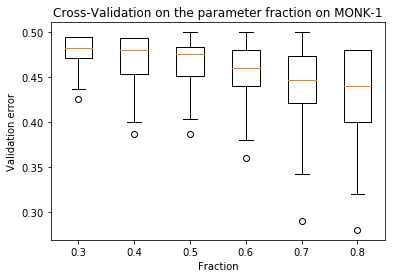

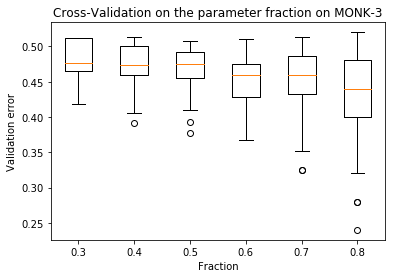

In [13]:
# Cross-validation of the validation test error with respect to fraction
boxplot_val(m.monk1,1)
boxplot_val(m.monk3,3)